Sampling single mode initial states using methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033); errata [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

We also sample some new distributions:
- fock state for +W
- thermal state for +P

In [1]:
using PhaseSpaceTools, PyPlot, Revise

┌ Info: Recompiling stale cache file /Users/abradley/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1187


In [2]:
?coherent

search: coherent cohere



```
a,ā = coherent(β,N;dist="+P")
```

Sample the phase-space distribution for a coherent state.

`β`: coherent (complex) amplitude.

`N`: number of samples.

`dist`: phase-space distrubtion. Can be either `W` or `+P`.

For a coherent state in +P, the distribution is just a point on the complex plane at the position of the coherent amplitude.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


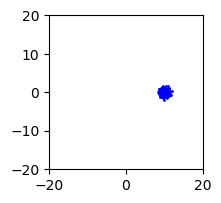

99.81584847578729 + 0.0im
9.98945987408454 + 0.00903746097518039im


In [3]:
b=10
N=1000
a,ā = coherent(b,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(mean(a))

In [4]:
?thermal

search: thermal NoncentralHypergeometric FisherNoncentralHypergeometric



```
a,ā = thermal(β,n̄,N;dist="P")
```

Sample the phase-space distribution for a thermal state.

`β`: coherent (complex) displacement.

`n̄`: thermal average population.

`N`: number of samples.

`dist`: phase-space distribution. Can be `P`, `Q` or `W`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


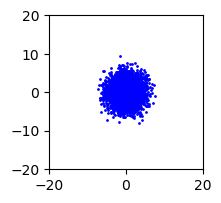

9.880666760474435 + 0.0im

In [5]:
a,ā = thermal(0,10,5000;dist="P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)

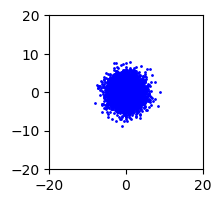

9.883030652436352 + 0.0im

In [6]:
a,ā = thermal(0,10,5000;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)-.5

In [7]:
?squeezed

search: squeezed



```
a,ā = squeezed(β,ϵ,N;dist="+P")
```

Sample the phase-space distribution for a squeezed state.

`β`: coherent (complex) amplitude.

`ϵ`: complex valued squeezing parameter.

`N`: number of samples.

`dist`: phase-space distribution; can be `W` or `+P`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


104.55947099335448 + 0.0im


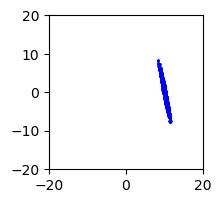

104.53383099788888


In [8]:
β = 10
ϕ = π/16
r = 1.5
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2 + abs2(β))

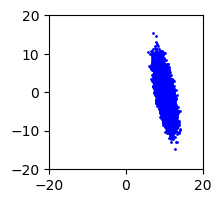

113.31146117936031
113.15411641800824


In [9]:
β = 10
ϕ = π/16
r = 2
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(real(mean(a.*ā)))
println(sinh(abs(ϵ)).^2+abs2(β))

In [10]:
?fock

search: fock foreach UniformScaling FisherNoncentralHypergeometric



```
a,ā = fock(n,N;dist="+P")
```

Sample the phase-space distribution for a Fock state.

`n`: number of the fock state |n⟩.

`N`: number of samples.

`dist`: phase-space distribution can be either `W`, `+W`, or `+P`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.

## Wigner representation

  * The standard `W` is sampled using an approximation that reproduces operator averages accuratley for large `n`, but neglects some quantum correlations.
  * The `+W` sampling is carried out in a doubled phase space, where the distribution is positive semi-definite, and hence may be sampled exactly for any `n`. Fast evaluation is achieved for large `n` using an accurate asymptotic expansion `(n>320)`.

External links

[Numerical representation of quantum states in the positive-P and Wigner representations, Olsen, Bradley, Optics Communications 282, 3924 (2009)](http://dx.doi.org/10.1016/j.optcom.2009.06.033)


 
n = 100 Fock state.
N = 1000000 samples.
 
averages
<â> = -0.011816549024790634 - 0.00566288839375873im
<â⁺â> = 100.00032011156729
V(n̂) = -0.0007295487703231629
rel. num. var. = 

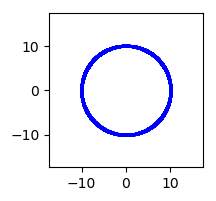

0.00027010074039246625


In [11]:
n = 100
N = 1000000
a,ā = fock(n,N;dist="W")

figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(3n),sqrt(3n),-sqrt(3n),sqrt(3n)])
n̄ = mean(abs2.(a))-.5
Vn= mean(abs2.(a).^2)-mean(abs2.(a))-n̄.^2
println(" ")
println("n = $n Fock state.")
println("N = $N samples.")
println(" ")
println("averages")
println("<â> = ", mean(a))
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)
println("rel. num. var. = ",sqrt(abs(Vn))/abs(n̄))

  0.465205 seconds (1.67 M allocations: 178.128 MiB, 53.13% gc time)


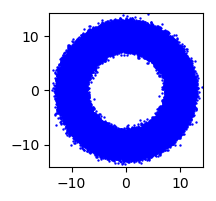

 
n = 100 Fock state.
N = 1000000 samples.
 
averages
<â> = -0.002344212687675532 + 0.003409488164792393im
<â⁺â> = 100.00341005244604 + 0.0034339390606391925im
V(n̂) = 0.07724429090012563 + 0.11722206648310085im
rel. num. var. = 0.0037466587541111133


In [14]:
n = 100
N = 1000000
@time a,ā = fock(n,N,dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
n̄ = mean(ā.*a)
Vn= mean(ā.^2 .* a.^2)+mean(ā.*a)-n̄.^2
println(" ")
println("n = $n Fock state.")
println("N = $N samples.")
println(" ")
println("averages")
println("<â> = ", mean(a))
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)
println("rel. num. var. = ",sqrt(abs(Vn))/abs(n̄))

  6.818405 seconds (103.48 k allocations: 155.539 MiB, 0.50% gc time)
 

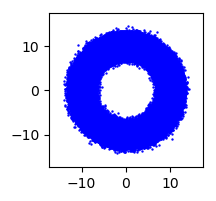


n = 100 Fock state.
N = 1000000 samples.
 
averages
<â> = -0.0002583419996452567 - 0.013159213649783282im
<â⁺â> = 99.99532724161402 - 0.002454216719241654im
V(n̂) = -0.03050542801793199 + 0.2910402189803418im
rel. num. var. = 0.005409823635163482


In [16]:
n = 100
N = 1000000
@time a,ā = fock(n,N,dist="+W")

figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(3n),sqrt(3n),-sqrt(3n),sqrt(3n)])
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2 .* a.^2)-mean(ā.*a)-n̄.^2
println(" ")
println("n = $n Fock state.")
println("N = $N samples.")
println(" ")
println("averages")
println("<â> = ", mean(a))
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)
println("rel. num. var. = ",sqrt(abs(Vn))/abs(n̄))

  0.003290 seconds (1.04 k allocations: 1.717 MiB)


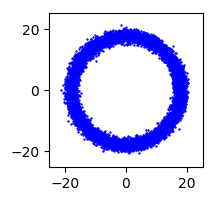

 
n = 321 Fock state.
N = 10000 samples.
 
averages
<â> = -0.03670185788013434 + 0.012015078151130138im
<â⁺â> = 321.0512794041959 + 0.11726767398032503im
V(n̂) = -15.167233914326061 + 16.654151473089954im
rel. num. var. =0.01478306244185235


In [20]:
#for n>320 uses asymptotic expansion
n=321
N=10000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2 .* a.^2)-mean(ā.*a)-n̄.^2
println(" ")
println("n = $n Fock state.")
println("N = $N samples.")
println(" ")
println("averages")
println("<â> = ", mean(a))
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)
println("rel. num. var. =",sqrt(abs(Vn))/abs(n̄))

  0.003624 seconds (1.25 k allocations: 1.720 MiB)
 

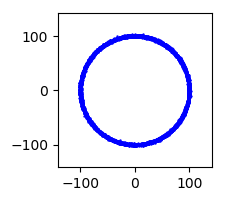


n = 10000 Fock state.
N = 10000 samples.
 
averages
<â> = -0.057306748819657694 - 0.16417364951134875im
<â⁺â> = 9999.452442092448 + 0.9087739051048639im
V(n̂) = -447.25328463315964 + 753.7163161841308im
rel. num. var. =0.0029606125954338004


In [22]:
#push n and N
n=10000
N=10000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2 .* a.^2)-mean(ā.*a)-n̄.^2
println(" ")
println("n = $n Fock state.")
println("N = $N samples.")
println(" ")
println("averages")
println("<â> = ", mean(a))
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)
println("rel. num. var. =",sqrt(abs(Vn))/abs(n̄))

In [23]:
?crescent

search: crescent CartesianIndices



```
a,ā = crescent(β,ϵ,q,N;dist="+P")
```

Sample the phase-space distribution for a crescent state. First samples a squeezed state, then introduces a searing factor in phase-space in the form of a gaussian distributed random phase.

`β` is coherent (complex) amplitude.

`ϵ`: squeezing paramter.

`q`: shearing parameter.

`N`: number of samples.

`dist`: phase-space distribution. Can be `+P`,`Q` or `W`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


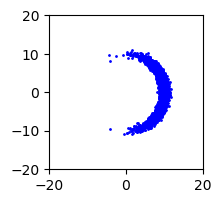

99.73089412852262 + 0.0im
100.0


In [24]:
β = 10
ϵ = 0
q = .5
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
#not quite the right moments for crescent state, but a sanity check of sorts:
println(sinh(abs(ϵ)).^2+abs2(β)) 

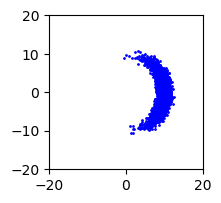

100.0007697278656 + 0.0im
100.0


In [25]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="Q")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-1)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

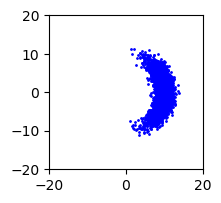

100.38082341823147 + 0.22019719066361282im
100.0


In [26]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

In [ ]:
#=
Test standard truncted Wigner as simple loop over separate calls to
OrdinaryDiffEq
=#

using DifferentialEquations, PyPlot

#using RandomNumbers.Xorshifts
#r1 = Xorshift1024Star()

#=
This function from PhaseSpaceTools.jl (unregistered, my github) is the only one that could affect the initial condtion
See dist="W" (line 54), where ultimatelly it is just a call to rand() that ensures an indeterminate phase over [0,2π).
I tried to using RandomNumbers.jl to see if this would improve rand() [might reveal if this is really the issue], but
the result of dynamics is the same.
=#

using Revise, PhaseSpaceTools, PyPlot

#lets do some checks for the fock state sampler
n = 10
N = 10000
a,ā = fock(n,N;dist="W")

figure(figsize=(4,4))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(3n),sqrt(3n),-sqrt(3n),sqrt(3n)])
n̄ = mean(abs2.(a))-.5
Vn= mean(abs2.(a).^2)-mean(abs2.(a))-n̄.^2
println(" ")
println("n = $n Fock state.")
println("N = $N samples.")
println(" ")
println("Operator averages:")
println("<â> = ", mean(a))
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)
println("rel. num. var. = ",sqrt(abs(Vn))/abs(n̄))

#has right statistics for means and variances:
#no mean field (first av.), mean number is n (second av.),
#small number variance (3rd av.), and small relative number variance (4th av.)

#now solve ode as simple loop (no noise in dynamics, so test of either ode dynamics or initial condition sampling)

#ode
f = @ode_def_bare Drift begin
  dα₁ = -2*im*χ*abs2(α₁)*α₁ + im*J*α₂
  dα₂ = -2*im*χ*abs2(α₂)*α₂ + im*J*α₁
end χ=>0.2 J=1.0


#time
ti = 0.
tf = 10.
Nt = 100
tspan = (ti,tf)
t = collect(linspace(ti,tf,Nt))
a0= complex(ones(Nt))


function boser(Ntraj)
Na = 10
Nb = 0
n1 = zeros(complex(Nt))
n2 = zeros(complex(Nt))

#just an honest loop
for j=1:Ntraj
    a,ā = fock(Na,1,dist="W")
    b,b̄ = fock(Nb,1,dist="W")
    prob = ODEProblem(f,[a[1];b[1]],tspan)

    alg = DP5()
    dt = 1/1000

    sol = solve(prob,alg,reltol=1e-7,dt=dt,saveat=t)

    α₁ = sol[1,:]
    α₂ = sol[2,:]
    n1 .+= abs2.(α₁)
    n2 .+= abs2.(α₂)
end

n1/=Ntraj
n2/=Ntraj
n1+=-.5
n2+=-.5
return n1,n2
end

#compile
_n1,_n2=boser(1)

n1,n2=boser(5000)

f1=figure(figsize=(4,4))
plot(t,n1)
plot(t,n2)
xlim(ti,tf)

#Now compare with exact evolution in number state basis
using QuantumOptics

χ=0.2
J=1
Nbasis = 40
b1 = FockBasis(Nbasis)
b2 = FockBasis(Nbasis)
bas= b1⊗b2
a = destroy(b1)
a⁺ = create(b1)
b = destroy(b2)
b⁺= create(b2)
Ia= identityoperator(b1)
Ib= identityoperator(b2)

H = χ*((a⁺*a⁺*a*a) ⊗ Ib + Ia ⊗ (b⁺*b⁺*b*b)) - J*(a⊗b⁺ + a⁺⊗b)

ti = 0.0
tf = 10.0
Nt = 100
t = collect(linspace(ti,tf,Nt))
psi0 = fockstate(b1, 10) ⊗ fockstate(b2,0)
tout, psit = timeevolution.schroedinger(t, psi0, H)

na = number(b1);nb = number(b2)
Na = real(expect(na⊗Ib,psit))
Nb = real(expect(Ia⊗nb,psit))

#figure(figsize=(5,4))
#xlim(0, tf)
#ylim(0,10)
plot(t,Na,"-.")
plot(t,Nb,"-.")
#plot(t,n1,"--")
#plot(t,n2,"--")
xlabel(L"t")
ylabel(L"\langle \hat n \rangle")
legend([L"N_a (W)",L"N_b (W)",L"N_a",L"N_b"],loc="lower right");
#savefig("compareExact_Wigner.pdf")